In [1]:
from drlqap.qap import GraphAssignmentProblem
from drlqap.evaluate import random_assignment
import numpy as np
import matplotlib.pyplot as plt
from drlqap.simplesolver import solve_qap_backtracking

In [2]:
with open("../qapdata/testgraph.dat", "r") as f:
    qap = GraphAssignmentProblem.from_qaplib_string(f.read())

In [3]:
n = qap.size
counts = np.zeros((n,n))
sums = np.zeros((n,n))

samples = 10000
for _ in range(samples):
    assignment = random_assignment(qap)
    value = qap.compute_value(assignment)
    for i,j in enumerate(assignment):
        counts[i,j] += 1
        sums[i,j] += value

In [4]:
averages = sums / counts

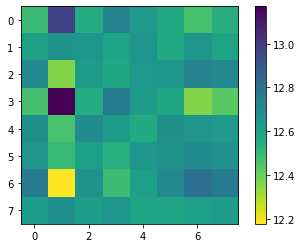

In [5]:
%matplotlib inline
plt.imshow(averages, cmap=plt.get_cmap("viridis_r"))
plt.colorbar()

In [6]:
optimal_value, optimal_assignment = solve_qap_backtracking(qap)

In [7]:
optimal_value

tensor(9.3004)

In [8]:
optimal_assignment

[7, 6, 4, 0, 2, 3, 1, 5]

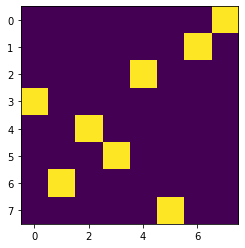

In [9]:
plt.imshow(np.eye(qap.size)[optimal_assignment])

In [10]:
qap.compute_value([7, 0, 3, 6, 5, 4, 1, 2])

tensor(9.7621)